In [1]:
import pandas as pd
import json
import os

In [2]:
os.getcwd()

'/u/yshi23/sonar/src'

In [3]:
def extract_data_from_subfolders(base_dir):
    all_data = []

    # Iterate over each subfolder in the base directory
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        
        if os.path.isdir(subfolder_path):
            print(subfolder_path)
            try:
            # Extract the value of p from the subfolder name
                p_value = float(subfolder.split('mnist')[0])
            except ValueError:
                # Skip the subfolder if the p value is not a float
                continue

            # Load the JSON data
            gia_stat_path = os.path.join(subfolder_path, 'logs/node_1/gia_stat_summary.json')
            network_stats_path = os.path.join(subfolder_path, 'logs/node_1/network_stats.json')

            if os.path.exists(gia_stat_path) and os.path.exists(network_stats_path):
                with open(gia_stat_path, 'r') as f:
                    gia_data = json.load(f)

                with open(network_stats_path, 'r') as f:
                    network_data = json.load(f)

                # Extract node IDs from network_stats.json
                node_ids = list(network_data['shortest_paths'].keys())

                # Create a DataFrame with node_id as a column
                data = []
                for node_id in node_ids:
                    # Get PSNR value from gia_data, defaulting to 0 if node_id doesn't exist
                    psnr = gia_data.get(node_id, {}).get('test_psnr', 0)

                    # Append the row data
                    row = {
                        'node_id': int(node_id),  # Ensure node_id is an integer
                        'PSNR': psnr,
                        'density': network_data['density'],
                        'shortest_paths': network_data['shortest_paths'][node_id],
                        'eigenvector_centrality': network_data['eigenvector_centrality'][node_id],
                        'closeness_centrality': network_data['closeness_centrality'][node_id],
                        'degree_centrality': network_data['degree_centrality'][node_id],
                        'p': p_value
                    }
                    data.append(row)

                # Create a DataFrame from the collected data
                df = pd.DataFrame(data)

                # Append the DataFrame to the list
                all_data.append(df)

    # Concatenate all DataFrames
    final_df = pd.concat(all_data, ignore_index=True)

    return final_df

# Example usage
base_dir = 'expt_dump/disambiguate'
final_df = extract_data_from_subfolders(base_dir)

# Save the final DataFrame to a CSV file
final_df.to_csv('gia_stat.csv')

expt_dump/disambiguate/0.6mnist_36users_1388_static_seed2
expt_dump/disambiguate/ring_mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.2mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.4mnist_36users_1388_static_seed2
expt_dump/disambiguate/torus_mnist_36users_1388_static_seed2
expt_dump/disambiguate/1.0mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.9mnist_36users_1388_static_seed2
expt_dump/disambiguate/fc_mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.7mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.3mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.8mnist_36users_1388_static_seed2
expt_dump/disambiguate/0.5mnist_36users_1388_static_seed2


In [4]:
# Calculate attacker centrality (node_id = 1)
attacker_eigenvector_centrality = final_df[final_df['node_id'] == 1]['eigenvector_centrality'].values[0]
attacker_closeness_centrality = final_df[final_df['node_id'] == 1]['closeness_centrality'].values[0]
attacker_degree_centrality = final_df[final_df['node_id'] == 1]['degree_centrality'].values[0]

# Calculate Relative Centrality Ratio (RCR) for each centrality measure
final_df['RCR_eigenvector'] = final_df['eigenvector_centrality'] 
final_df['RCR_closeness'] = final_df['closeness_centrality'] 
final_df['RCR_degree'] = final_df['degree_centrality']
# final_df['RCR_eigenvector'] = final_df['eigenvector_centrality'] / attacker_eigenvector_centrality
# final_df['RCR_closeness'] = final_df['closeness_centrality'] / attacker_closeness_centrality
# final_df['RCR_degree'] = final_df['degree_centrality'] / attacker_degree_centrality

# Display the updated DataFrame
print(final_df[['node_id', 'eigenvector_centrality', 'RCR_eigenvector', 'closeness_centrality', 'RCR_closeness', 'degree_centrality', 'RCR_degree']].head())

   node_id  eigenvector_centrality  RCR_eigenvector  closeness_centrality  \
0        1                0.174753         0.174753              0.729167   
1        4                0.161298         0.161298              0.700000   
2        5                0.191581         0.191581              0.760870   
3        9                0.174332         0.174332              0.729167   
4       12                0.191878         0.191878              0.760870   

   RCR_closeness  degree_centrality  RCR_degree  
0       0.729167           0.628571    0.628571  
1       0.700000           0.571429    0.571429  
2       0.760870           0.685714    0.685714  
3       0.729167           0.628571    0.628571  
4       0.760870           0.685714    0.685714  


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt



In [6]:
final_df.head()

node_id       PSNR   density  shortest_paths  eigenvector_centrality  \
0        1   0.000000  0.593651               0                0.174753   
1        4   6.713571  0.593651               1                0.161298   
2        5  12.390618  0.593651               1                0.191581   
3        9   9.810331  0.593651               1                0.174332   
4       12  11.033689  0.593651               1                0.191878   

   closeness_centrality  degree_centrality    p  RCR_eigenvector  \
0              0.729167           0.628571  0.6         0.174753   
1              0.700000           0.571429  0.6         0.161298   
2              0.760870           0.685714  0.6         0.191581   
3              0.729167           0.628571  0.6         0.174332   
4              0.760870           0.685714  0.6         0.191878   

   RCR_closeness  RCR_degree  
0       0.729167    0.628571  
1       0.700000    0.571429  
2       0.760870    0.685714  
3       0.729167    0.628571  
4       0.760870    0.685714

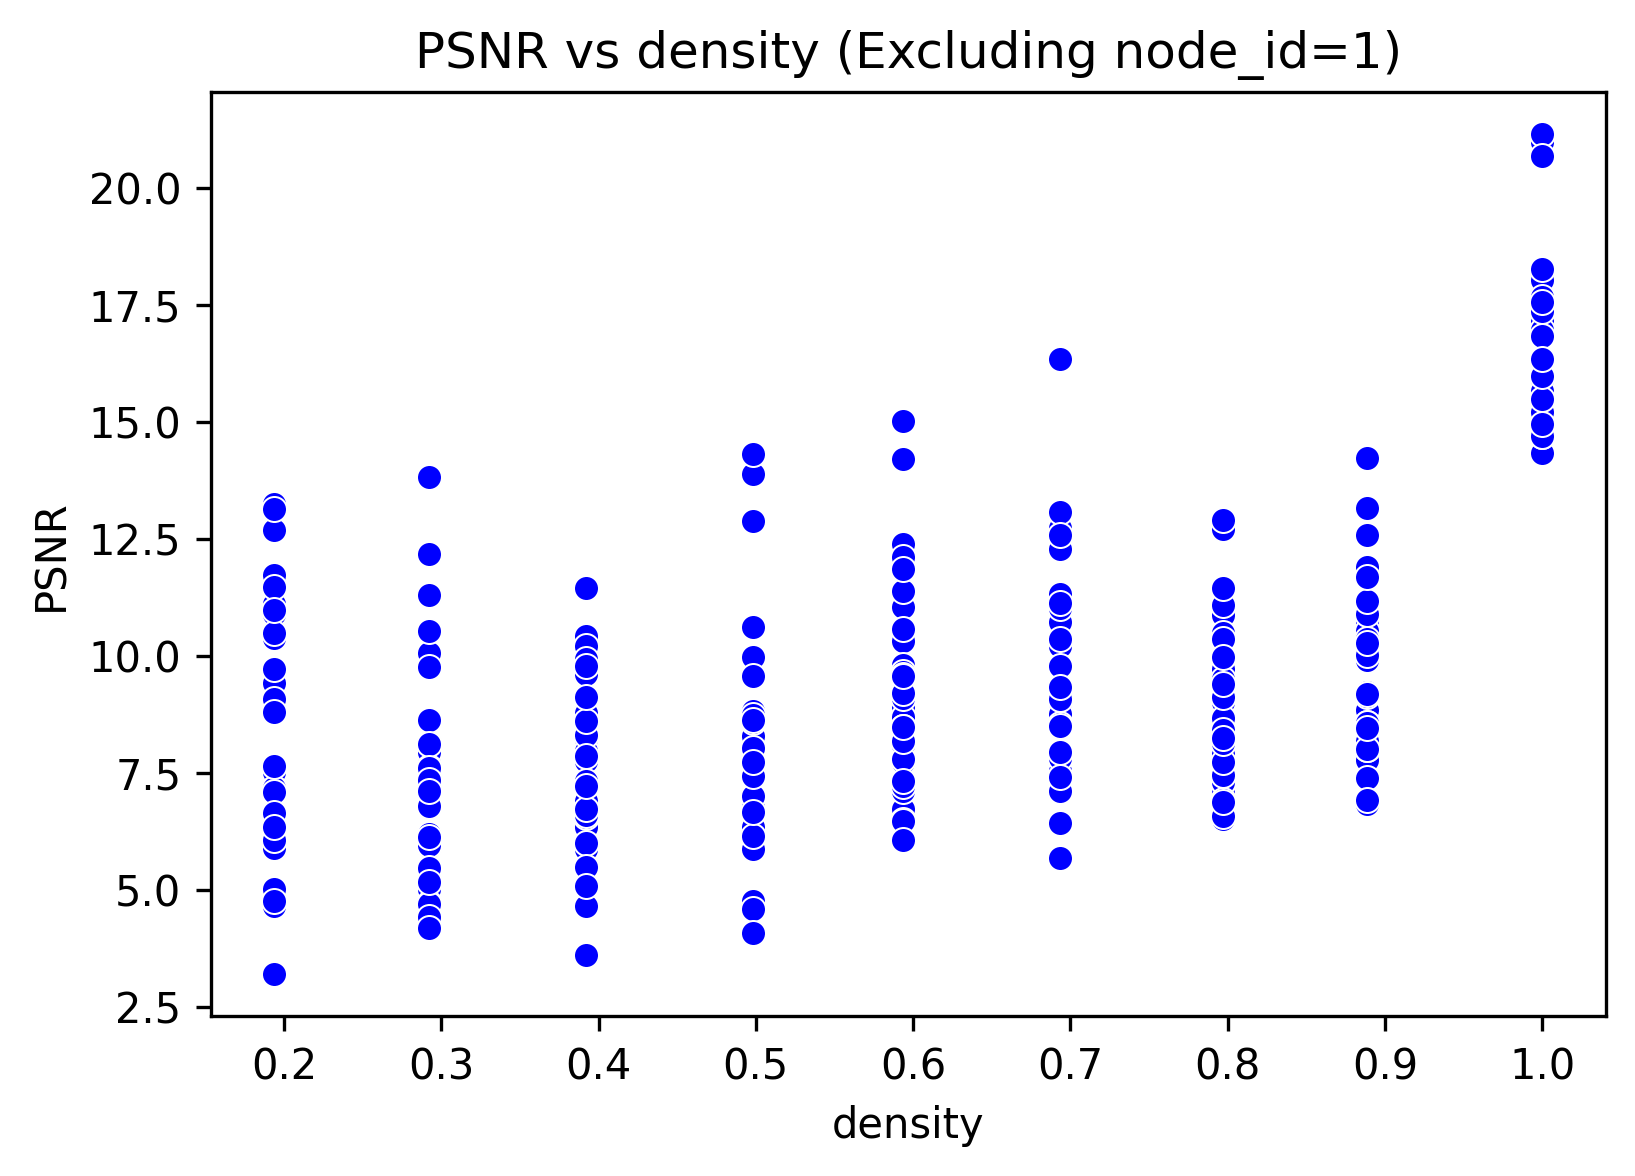

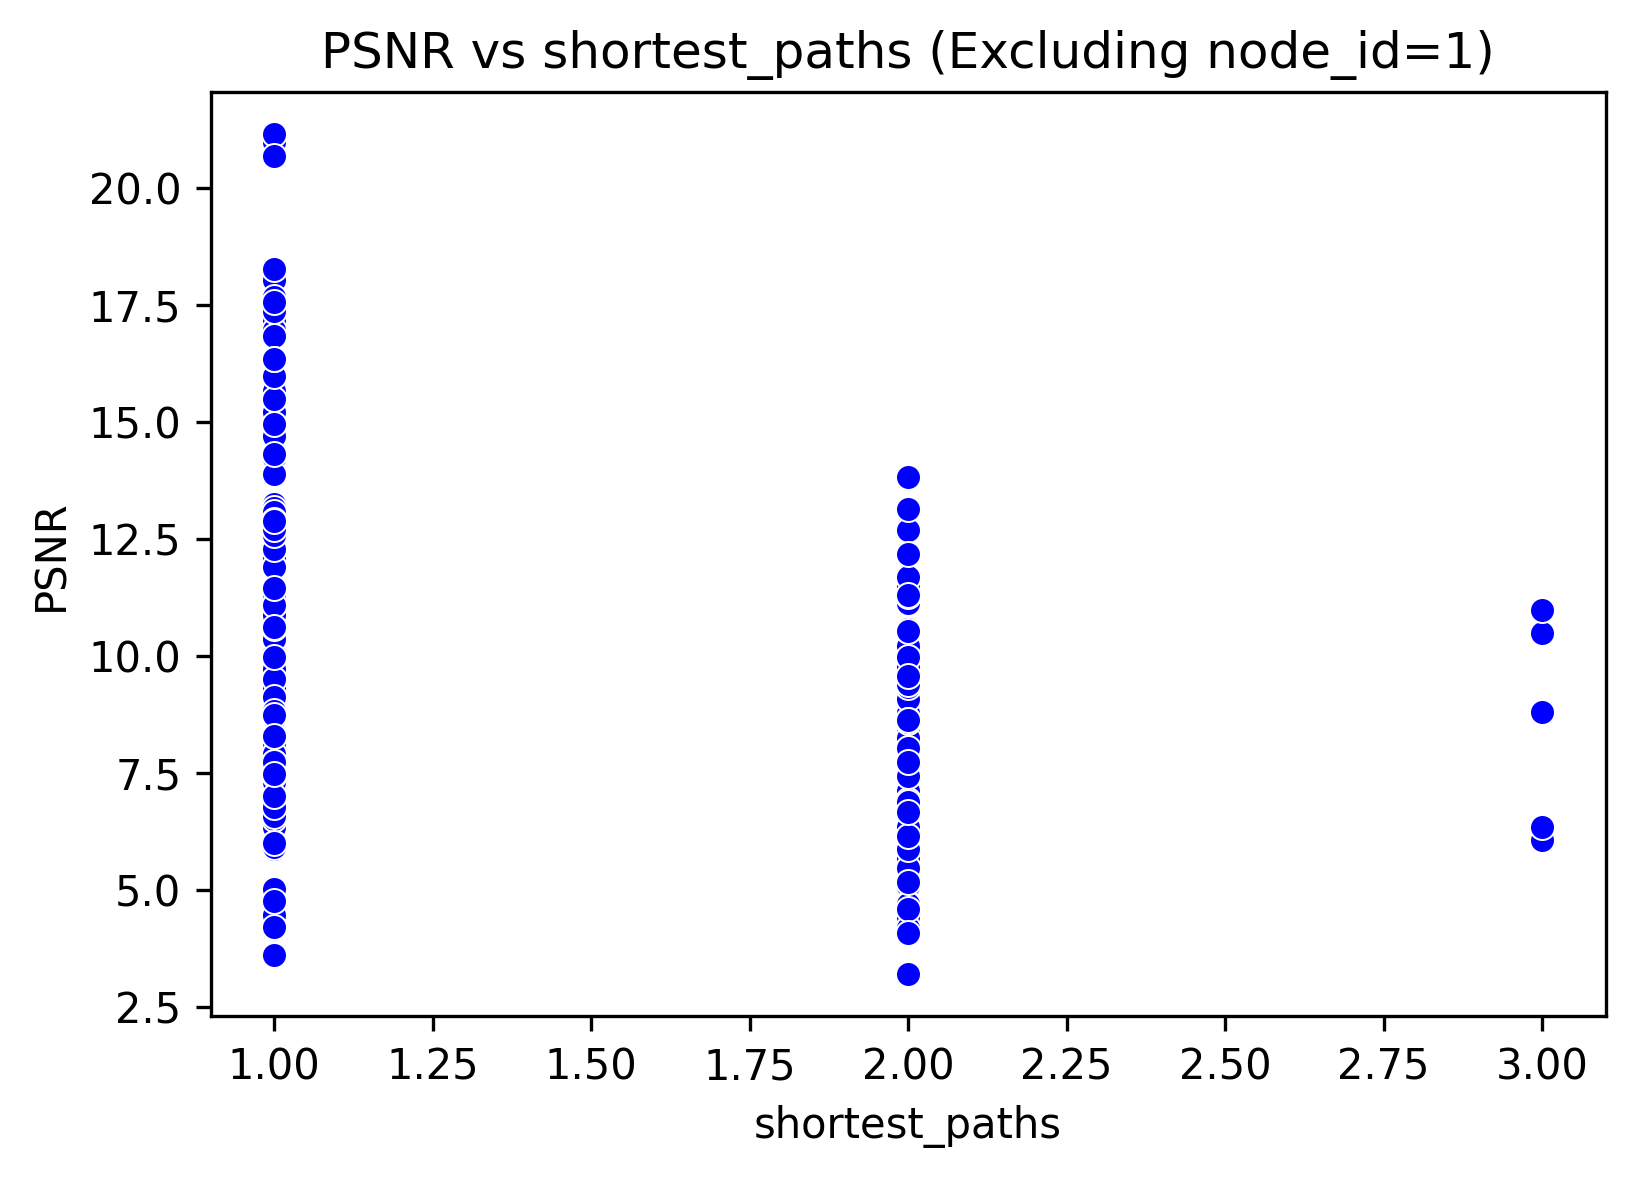

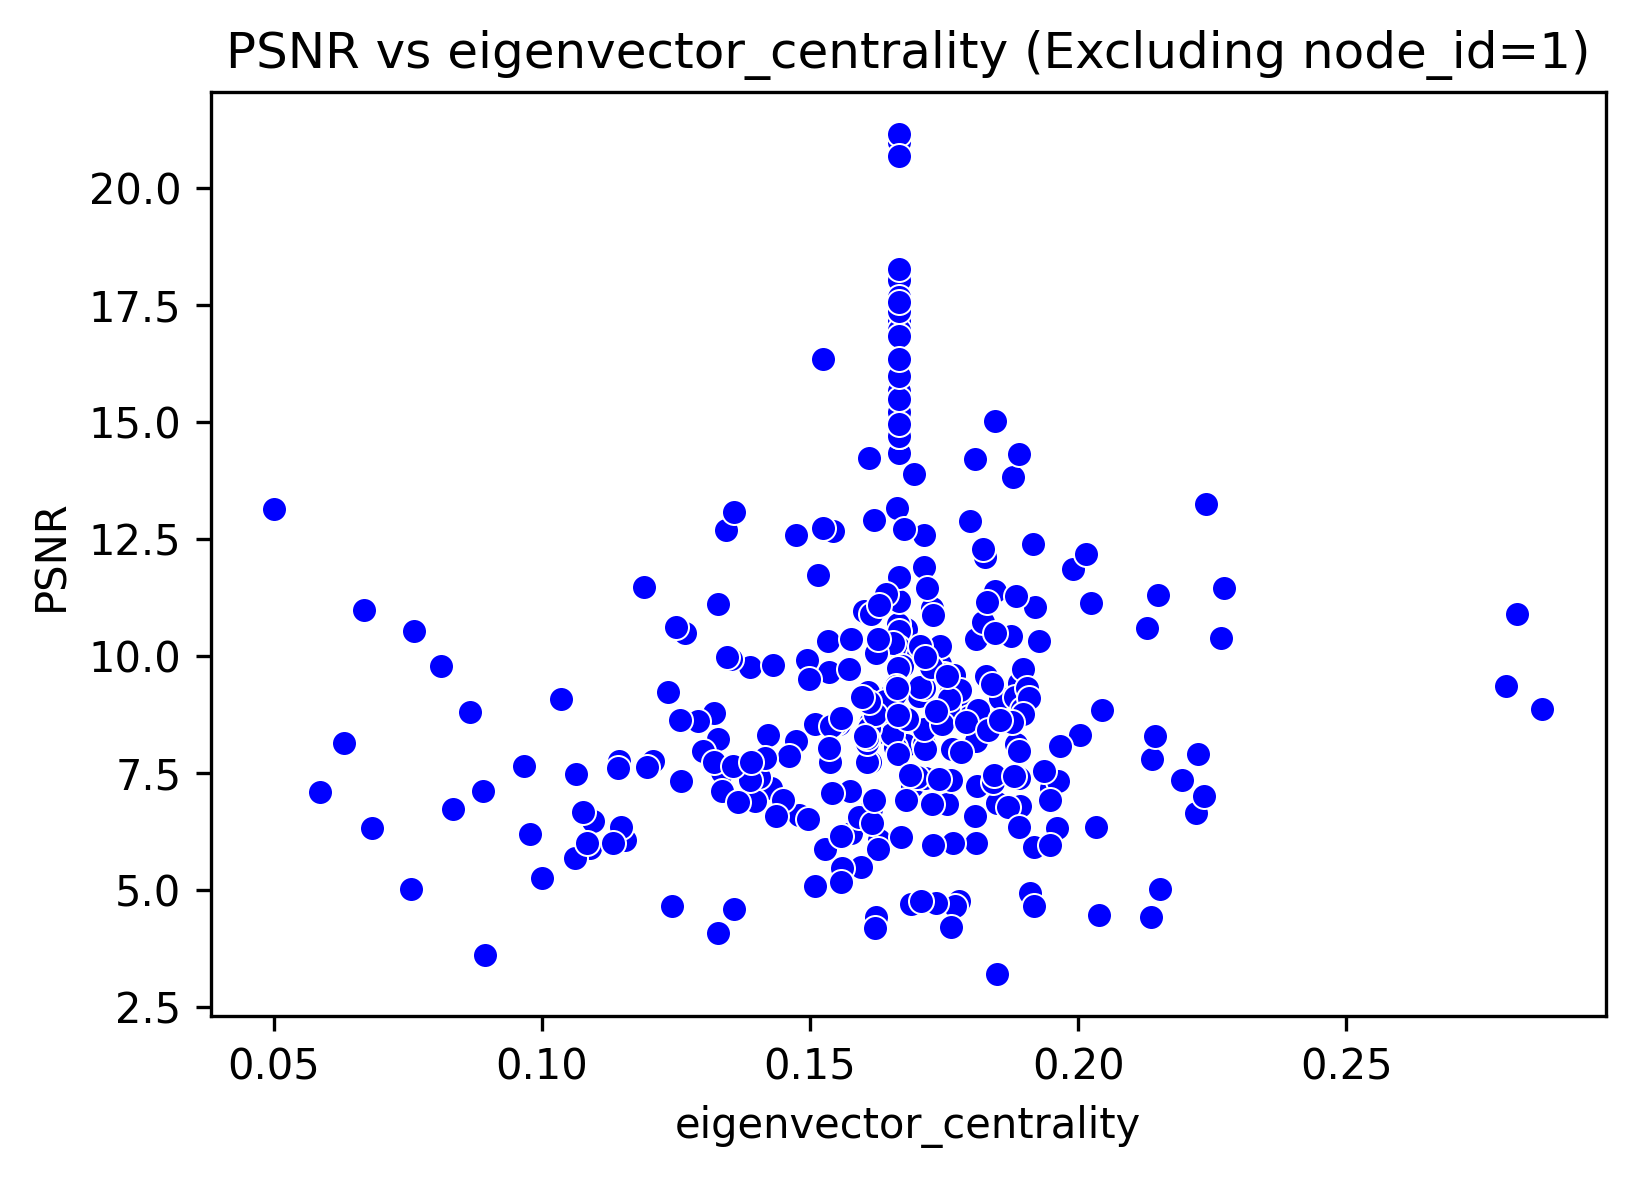

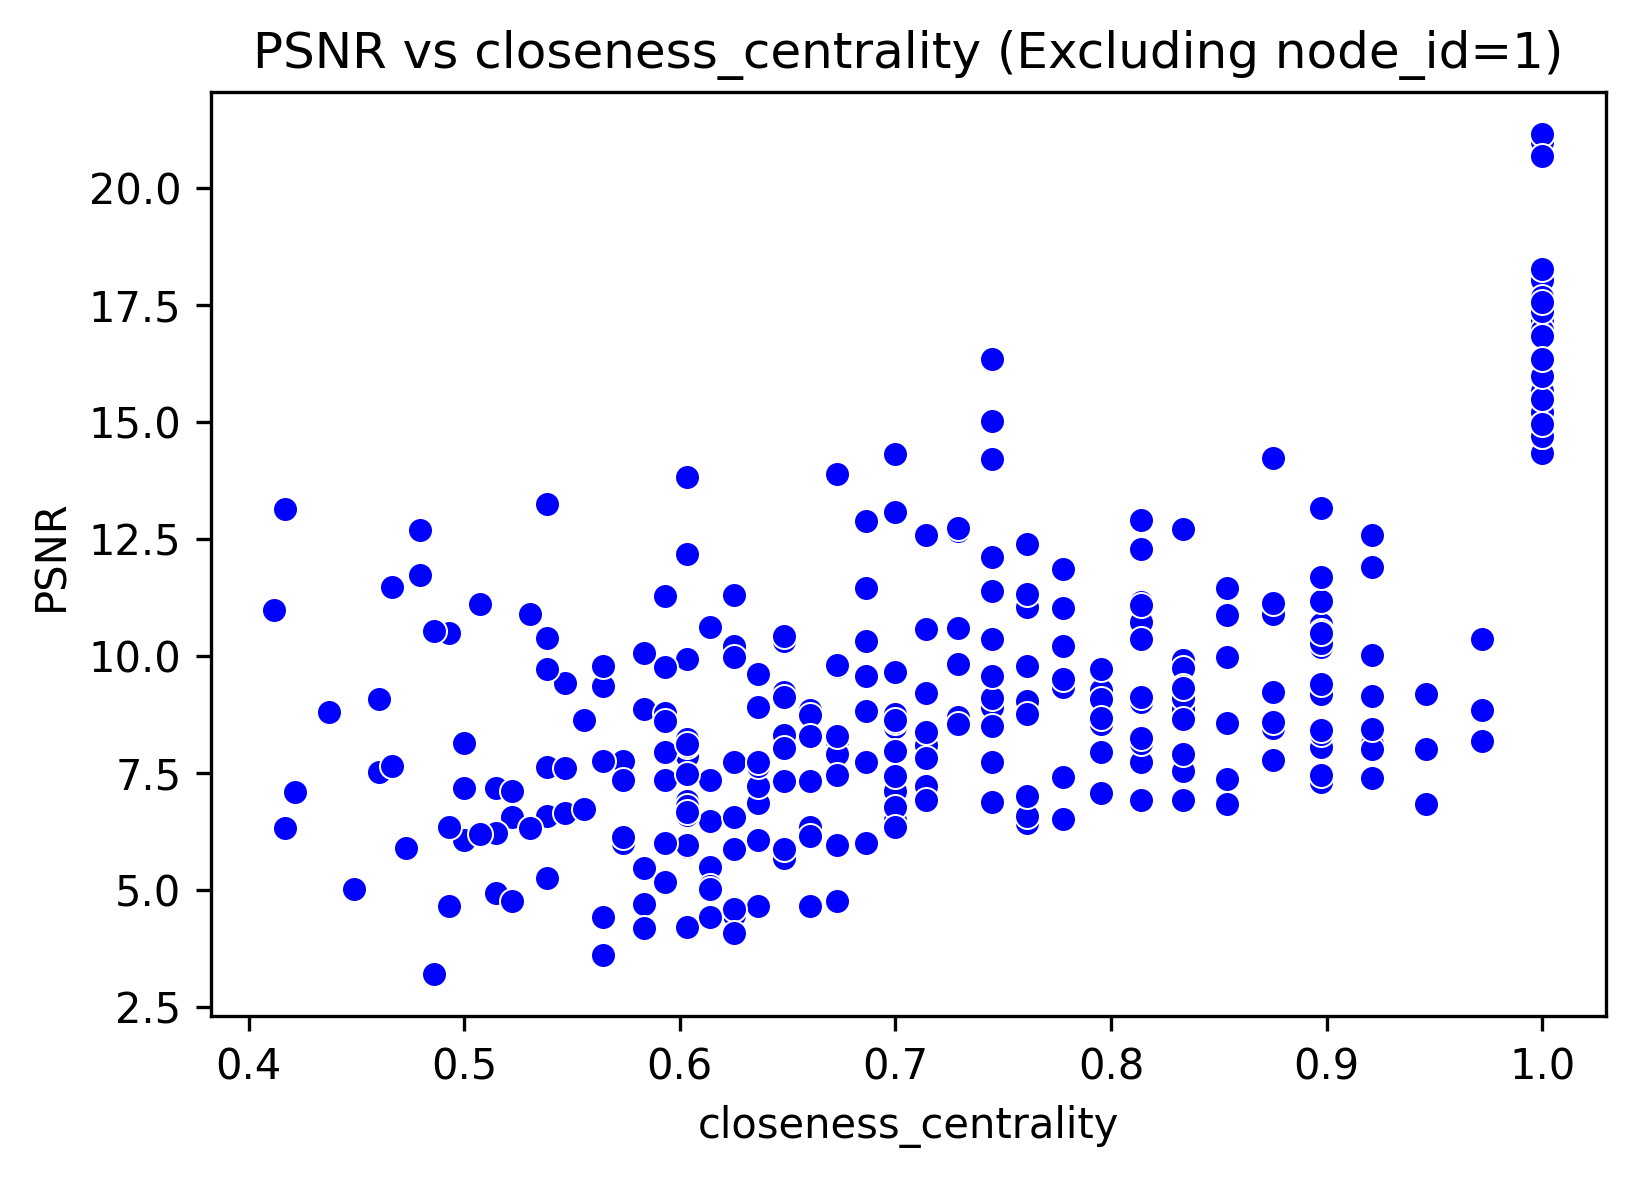

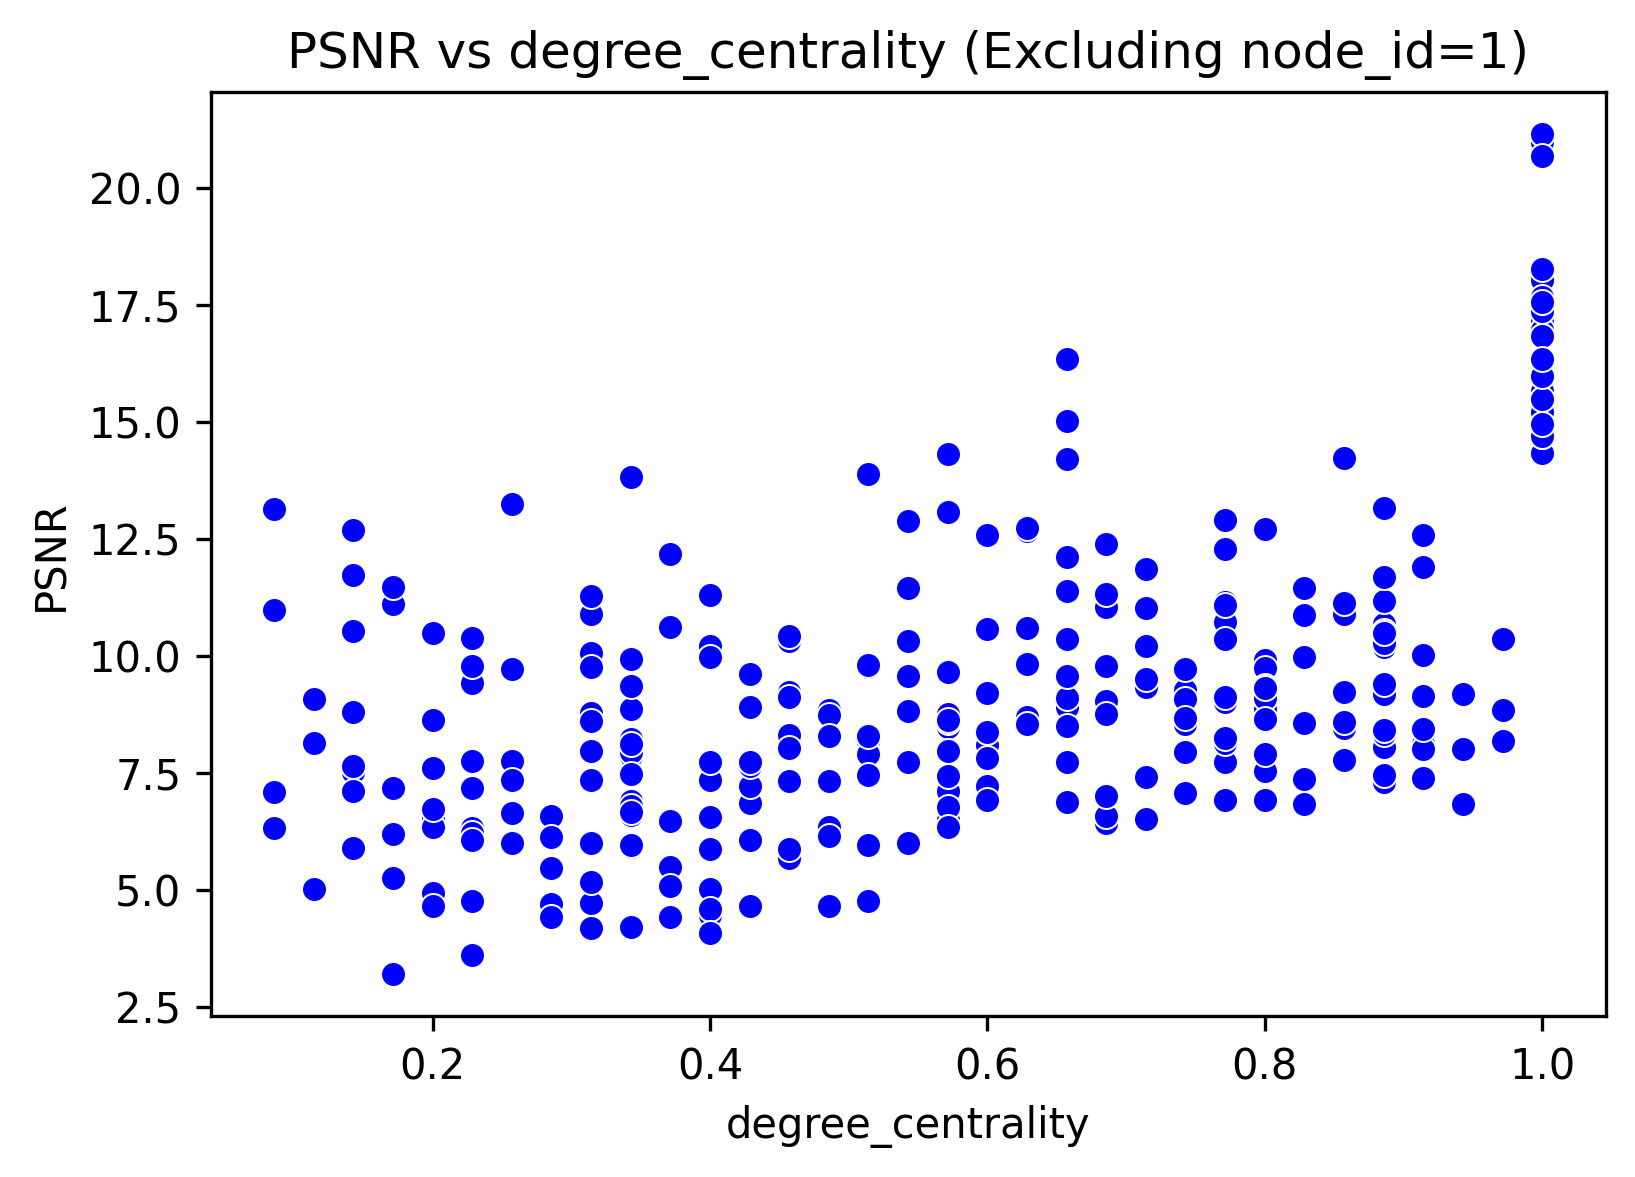

In [26]:
df = final_df

# Exclude rows where node_id = 1
df_filtered = df[df['node_id'] != 1]

# Scatter plots for each metric against PSNR
metrics = ['density', 'shortest_paths', 'eigenvector_centrality', 'closeness_centrality', 'degree_centrality']

for metric in metrics:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_filtered[metric], y=df_filtered['PSNR'], color='blue')  # All points are blue now
    plt.title(f'PSNR vs {metric} (Excluding node_id=1)')
    plt.xlabel(metric)
    plt.ylabel('PSNR')
    plt.rcParams['figure.dpi'] = 300 
    plt.show()

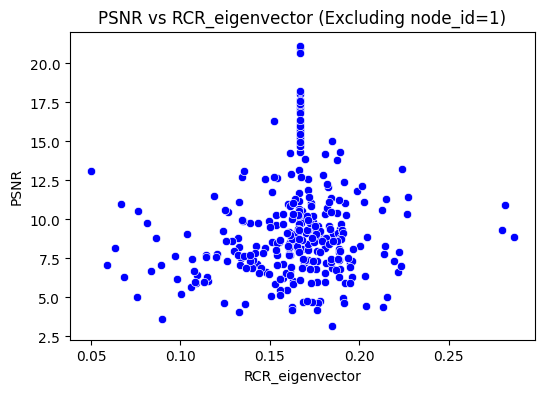

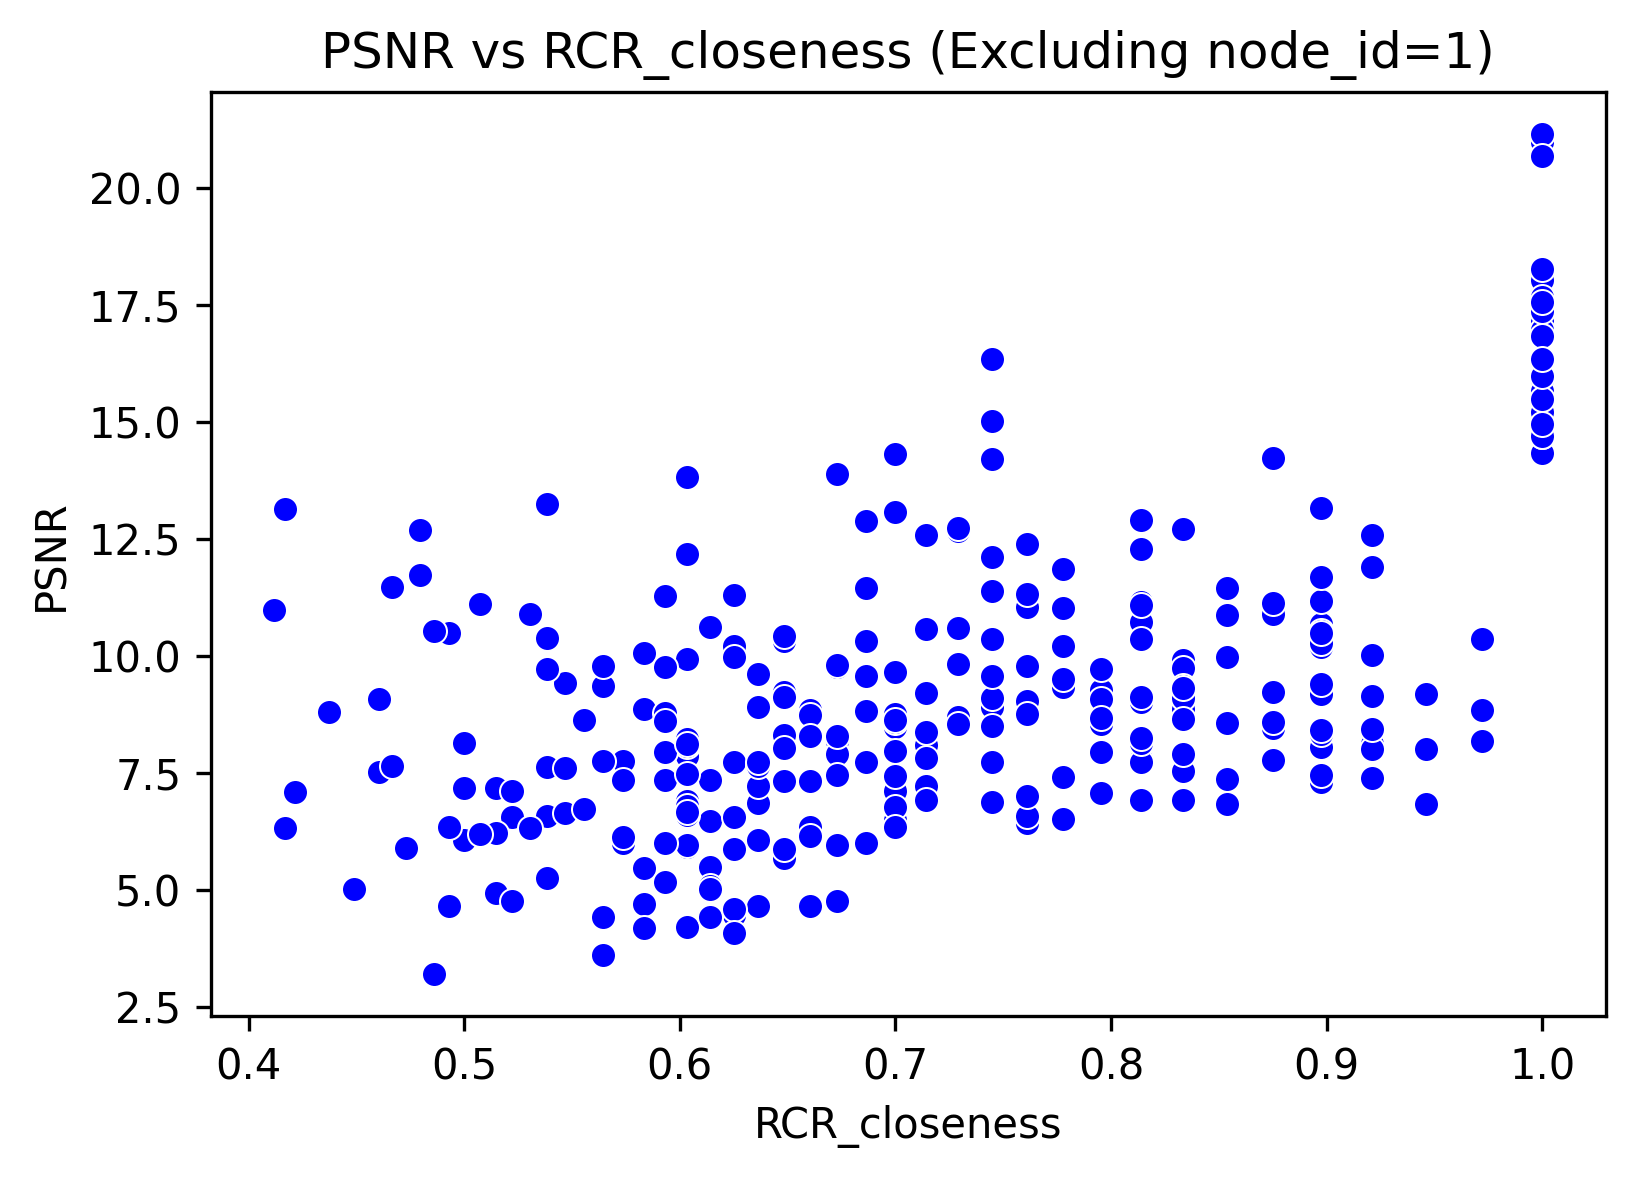

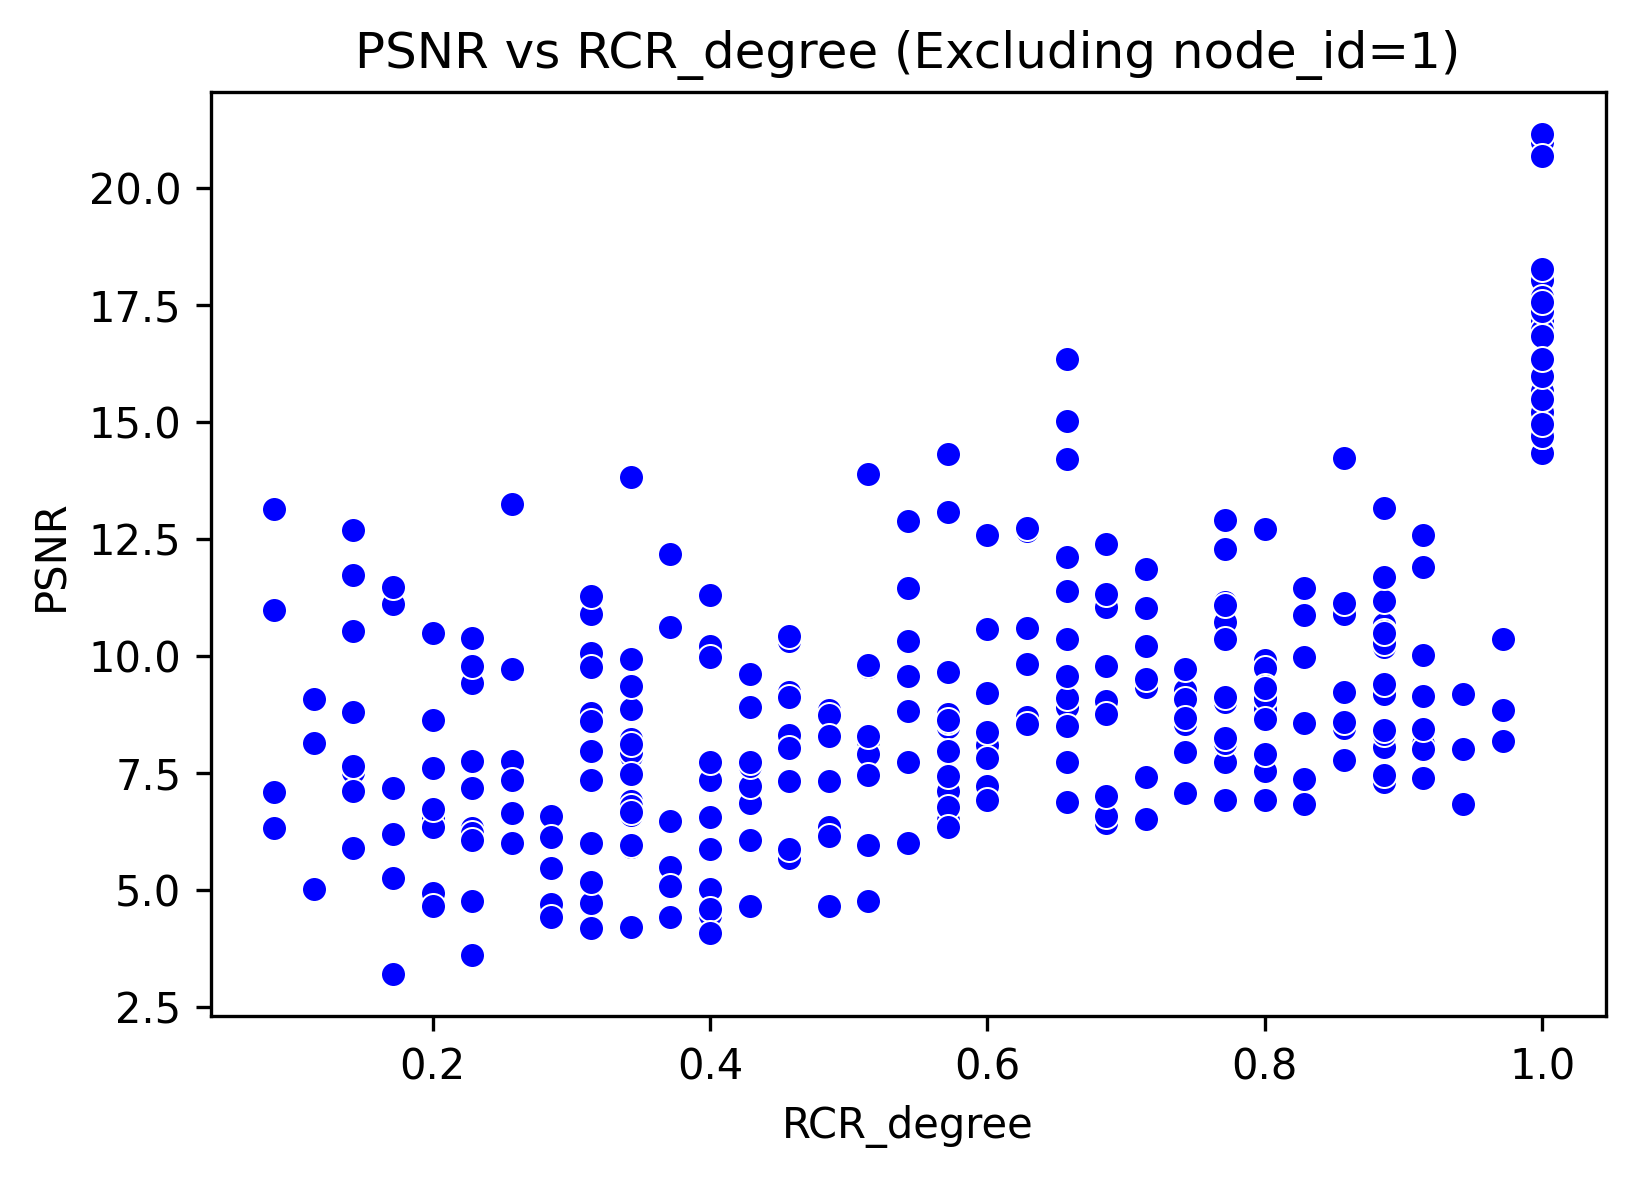

In [25]:
# Scatter plots for each RCR metric against PSNR
rcr_metrics = ['RCR_eigenvector', 'RCR_closeness', 'RCR_degree']

for rcr_metric in rcr_metrics:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_filtered[rcr_metric], y=df_filtered['PSNR'], color='blue')
    plt.title(f'PSNR vs {rcr_metric} (Excluding node_id=1)')
    plt.xlabel(rcr_metric)
    plt.ylabel('PSNR')
    plt.rcParams['figure.dpi'] = 300 
    plt.show()

In [29]:
# Calculate the correlation matrix
df_corr = df.drop(columns=['node_id'])
corr_matrix = df_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.rcParams['figure.dpi'] = 1300 
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Filter out points where shortest_paths == 0
filtered_df = final_df[final_df['shortest_paths'] > 0]

# Create a custom colormap from blue (low) to red (high)
colors = [(0, 0, 1), (1, 0, 0)]  # Blue to Red
cmap_name = 'blue_to_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Scale PSNR for significant size differences (adjust scale factor if needed)
point_sizes = (filtered_df['PSNR'] - filtered_df['PSNR'].min()) * 100 + 2

# # Increase spacing between points by adding noise
# jitter_x = np.random.uniform(-0.02, 0.02, size=len(filtered_df))
# jitter_y = np.random.uniform(-0.5, 0.5, size=len(filtered_df))

# Create the scatter plot
plt.figure(figsize=(12, 8))  # Increased figure size for better spacing
scatter = plt.scatter(
    filtered_df['eigenvector_centrality'], 
    filtered_df['shortest_paths'],
    s=point_sizes,  # Use PSNR to control size
    c=filtered_df['PSNR'],  # Still use PSNR for color (optional)
    cmap=cm,
    alpha=0.8,
    edgecolors='k',
    linewidths=0.5
)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('PSNR (dB)', rotation=270, labelpad=15)

# Add labels and title
plt.xlabel('eigenvector Centrality')
plt.ylabel('Shortest Paths')
plt.title('Relationship between Shortest Paths and eigenvector Centrality\nPSNR indicated by point size')

# Adjust axis limits for more spacing
plt.xlim(filtered_df['eigenvector_centrality'].min() - 0.1, filtered_df['eigenvector_centrality'].max() + 0.1)
plt.ylim(filtered_df['shortest_paths'].min() - 2, filtered_df['shortest_paths'].max() + 2)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout
plt.tight_layout()
plt.rcParams['figure.dpi'] = 1200 
# Show plot
plt.show()

